# Python libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import sympy

# Introduction

The simplest example of double descent that I can think of.  As Eisenstein said "make everything as simple as possible, but not simpler".

# Problem setup

## No noise case

Suppose that we have 3 datapoints drawn from the function $y = 0$:

$$
x_1 = 0, y_1 = 0 \\
x_2 = 0.5, y_2 = 0 \\
x_3 = 1, y_3 = 0
$$

and we want to fit them with a quadratic polynomial, then clearly the best fit is the zero polynomial.  

$$
y = 0 + 0x + 0x^2
$$


# Fixed noise case

However, suppose that our data at $x_2$ is noisy, and we observe the following:

$$
x_1 = 0, y_1 = 0 \\
x_2 = 0.5, y_2 = 0.1 \\
x_3 = 1, y_3 = 0
$$

What is the best fit now?  Well, we can still fit a quadratic polynomial, but how to compute the coefficients?  We want to keep things simple, so we will do it by hand by representing the polynomial in terms of its roots.

So, the polynomial of interest has two roots, namely

$$
x_1 = 0, y_1 = 0 \\
x_3 = 1, y_3 = 0
$$

and we can write it as

$$
y = a(x - x_1)(x - x_3)
$$

where $a$ is a constant.  We can solve for $a$ by plugging in the value of $y_2$:

$$
y_2 = a(x_2 - x_1)(x_2 - x_3) \\
0.1 = a(0.5 - 0)(0.5 - 1) \\
0.1 = a(0.5)(-0.5) \\
0.1 = a(-0.25) \\
0.1/(-0.25) = a \\
a = -0.4
$$

So, the best fit quadratic polynomial (in fact, *perfect fit* quadratic polynomial) is

$$
y = -0.4(x - 0)(x - 1)
$$


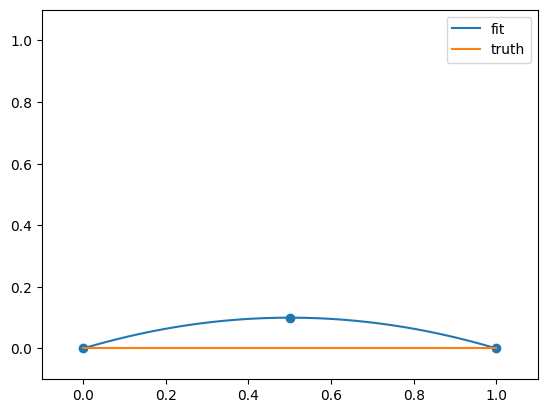

In [3]:
x = [0,0.5,1]
y = [0,0.1,0]
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.scatter(x,y)
x_all = np.linspace(0,1,100)
y_all = -0.4*(x_all-0)*(x_all-1)
plt.plot(x_all,y_all, label='fit')
plt.plot(x_all,0*y_all, label='truth')
plt.legend()


# Generic noise case

Let's generalize this to the case where 

$$
x_1 = 0, y_1 = 0 \\
x_2 = \epsilon_x, y_2 = \epsilon_y \\
x_3 = 1, y_3 = 0
$$

In this case, we can sompute the best fit quadratic polynomial by solving for $a$:

$$
\epsilon_y = a(\epsilon_x - 0)(\epsilon_x - 1) \\
\epsilon_y = a(\epsilon_x^2 - \epsilon_x) \\
\frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x} = a
$$

and we get

$$
y = \frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x - 0)(x - 1)
$$


Now, the game is afoot!   Note that 

$$
a=\frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}
$$ 

can be made arbitrarily large by making $\epsilon_x$ arbitrarily small in comparison to $\epsilon_y$.  So, we can make the best quadratic polynomial arbitrarily large, and arbitrarily far from the truth $y=0$ for any fixed noise level $\epsilon_y$ by choosing $\epsilon_x$ sufficiently small.  

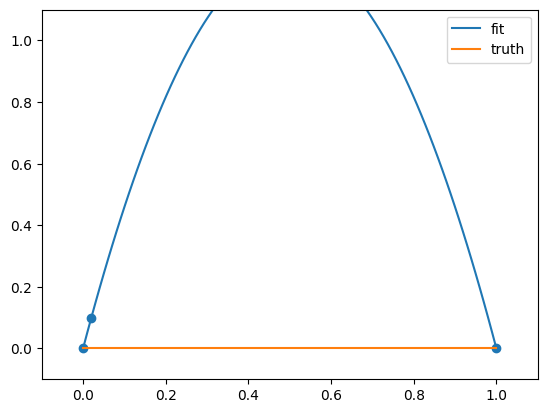

In [4]:
e_x = 0.02
e_y = 0.1
x = [0,e_x,1]
y = [0,e_y,0]
a = e_y/(e_x**2 - e_x)

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.scatter(x,y)
x_all = np.linspace(0,1,100)
y_all = a*(x_all-0)*(x_all-1)
plt.plot(x_all,y_all, label='fit')
plt.plot(x_all,0*y_all, label='truth')
plt.legend()


## Discussion

The source of the issue is clear.  When $\epsilon_x$ is small compared to $\epsilon_y$, the quadratic polynomial is forced have a large derivative at $x_2$, and fitting this large derivative requires a large coefficient $a$ and commenserate large departure from the truth. It is important to reiterate that this does not require a large noise level $\epsilon_y$, only a compartively small $\epsilon_x$.  I.e., for any given noise, the departure from the truth can be made arbitrarily large by making a bad choice of $\epsilon_x$.  But what does a "bad choice" mean?  Somewhat suprisingly, it happens when your data is *too dense*!  I.e., datapoints that are close together in $x$-space can cause the polynomial to have a large derivative, and this large derivative can cause the polynomial to have a large coefficient, and this large coefficient can cause the polynomial to have a large departure from the truth.  

Now, of course, this example is a bit contrived to make it simple, but it does teach some important truths, such as:

1.  The best fit polynomial can be arbitrarily far from the truth for any fixed noise level, if the data is sufficiently "dense".
2.  This is can even be true when the noise is small.
3.  Really, the noise is introducing *false* derivative information, and the derivative information is causing the large departure from the truth.

# Double descent

Let's now consider the double descent phenomena.

Reconciling modern machine-learning practice and the classical bias–variance trade-off
https://www.pnas.org/doi/full/10.1073/pnas.1903070116

A brief prehistory of double descent
https://www.pnas.org/doi/full/10.1073/pnas.2001875117

Double Descent Demystified: Identifying, Interpreting &
Ablating the Sources of a Deep Learning Puzzle
https://arxiv.org/pdf/2303.14151.pdf

So, let's try to be simultaneoulsy simple and precise.  Let $P_k$ be the set of all polynomials with $k$ real coefficients.  So, for the given data above, 

$$
x_1 = 0, y_1 = 0 \\
x_2 = \epsilon_x, y_2 = \epsilon_y \\
x_3 = 1, y_3 = 0
$$

we have that 

$$
f(x) = \frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x - 0)(x - 1)
$$

is the unique member of $P_2$ such that the loss

$$
\sum_{i=1}^3 (y_i - f(x_i))^2 = 0
$$

Now, let's make our function class larger and consider $P_3$.  How shall we parameterize $P_3$?  Well, we can write any polynomial in $P_3$ 
in terms of its roots and leading coefficient!

Choose $r_3$ to be arbitrary and consider the function

$$
f_{P_3}(x) = \frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x - 0)(x - 1)\frac{x-r_3}{x_2-r_3}.
$$

Clearly, $f_{P_3}(x_1) = f_{P_3}(0) = 0$ and $f_{P_3}(x_3) = f_{P_3}(1) = 0$.  What about $f_{P_3}(x_2)$?  Well, we have that

$$
f_{P_3}(x_2) = \\
\frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x_2 - 0)(x_2 - 1)\frac{x_2-r_3}{x_2-r_3} = \\
\frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x_2 - 0)(x_2 - 1)1 = \\
f(x_2)
$$



Simlarly, we can write down the complete family of functions in $P_4$ with zero-loss as:

$$
f(x) = \frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x - 0)(x - 1)\frac{(x- r_3)}{(x_2- r_3)}\frac{(x- r_4)}{(x_2- r_4)}
$$

and the $P_k$ case as:

$$
\frac{\epsilon_y}{\epsilon_x^2 - \epsilon_x}(x - 0)(x - 1)\frac{(x- r_3)}{(x_2- r_3)}\frac{(x- r_4)}{(x_2- r_4)} \cdots \frac{(x- r_k)}{(x_2- r_k)}
$$

all with $r_k$ arbitrary.  

So, a distribution over the $r_3, r_4, \cdots, r_k$ is a distribution over $P_k$.  

Let's look at $r_k \in [0,1]$.  This sometimes helps and sometimes hurts.

P_2 "integral of squares" 9.26831736225999
P_3 "integral of squares" 4.214989982000021
P_4 "integral of squares" 2.1386027052814054
P_5 "integral of squares" 1.2901820044287868


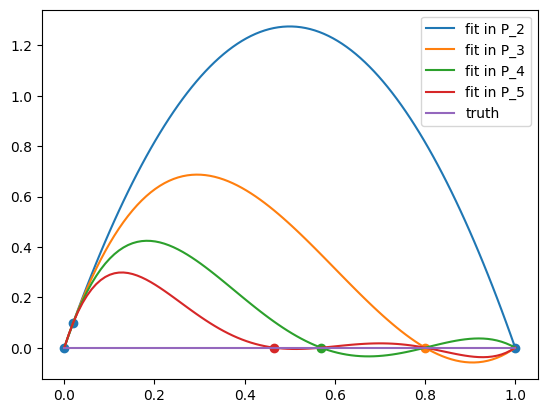

In [5]:
def r_3_5_plot(r_3,r_4,r_5):
    plt.scatter(x,y)
    x_all = np.linspace(0,1,100)

    y_all = a*(x_all-0)*(x_all-1)
    print(f'P_2 "integral of squares" {np.linalg.norm(y_all)}')
    plt.plot(x_all,y_all, label='fit in P_2')

    y_all = a*(x_all-0)*(x_all-1)*((x_all-r_3)/(x[1]-r_3))
    print(f'P_3 "integral of squares" {np.linalg.norm(y_all)}')
    plt.plot(x_all,y_all, label='fit in P_3')

    y_all = a*(x_all-0)*(x_all-1)*((x_all-r_3)/(x[1]-r_3))*((x_all-r_4)/(x[1]-r_4))
    print(f'P_4 "integral of squares" {np.linalg.norm(y_all)}')
    plt.plot(x_all,y_all, label='fit in P_4')

    y_all = a*(x_all-0)*(x_all-1)*((x_all-r_3)/(x[1]-r_3))*((x_all-r_4)/(x[1]-r_4))*((x_all-r_5)/(x[1]-r_5))
    print(f'P_5 "integral of squares" {np.linalg.norm(y_all)}')
    plt.plot(x_all,y_all, label='fit in P_5')

    plt.scatter(r_3,0)
    plt.scatter(r_4,0)
    plt.scatter(r_5,0)

    plt.plot(x_all,0*y_all, label='truth')
    plt.legend()

r_3 = np.random.rand()
r_4 = np.random.rand()
r_5 = np.random.rand()
r_3_5_plot(r_3,r_4,r_5)



What happens when $r_k$ is outside the range $[0,1]$?  This is always better!

P_2 "integral of squares" 9.26831736225999
P_3 "integral of squares" 6.239672980008223
P_4 "integral of squares" 3.9180702698040832
P_5 "integral of squares" 3.110757339066949


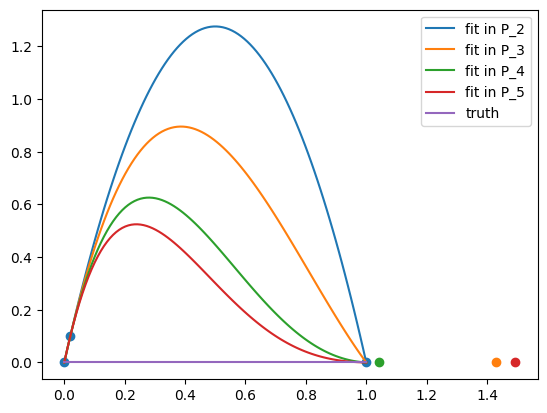

In [6]:
r_3 = np.random.rand()+1
r_4 = np.random.rand()+1
r_5 = np.random.rand()+1

r_3_5_plot(r_3,r_4,r_5)

A nice example

P_2 "integral of squares" 9.26831736225999
P_3 "integral of squares" 12.628750264977507
P_4 "integral of squares" 6.058722408040069
P_5 "integral of squares" 1.1822829773118606


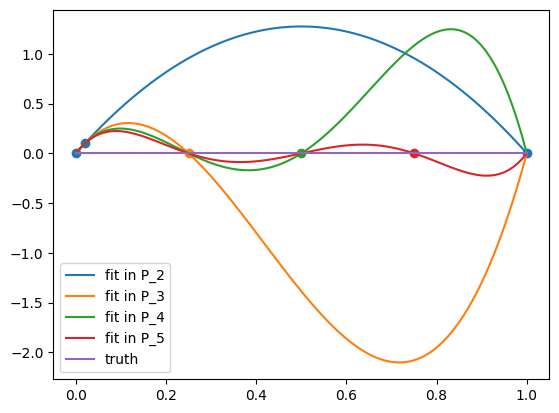

In [7]:
r_3 = 0.25
r_4 = 0.5
r_5 = 0.75

r_3_5_plot(r_3,r_4,r_5)

A bad example

P_2 "integral of squares" 9.26831736225999
P_3 "integral of squares" 44.62956869027631
P_4 "integral of squares" 277.2347597920786
P_5 "integral of squares" 1929.8332124481783


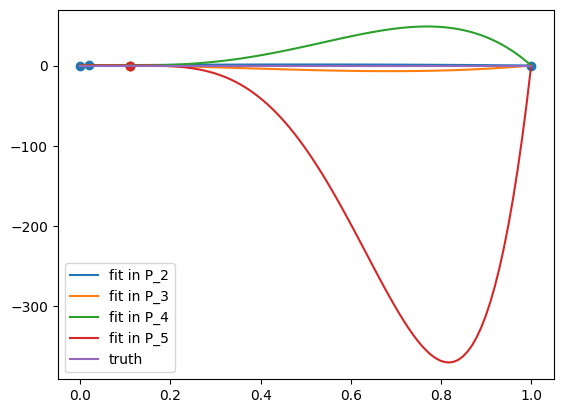

In [8]:
r_3 = 0.11
r_4 = 0.11
r_5 = 0.11

r_3_5_plot(r_3,r_4,r_5)

# Gradient descent


In [9]:
r = torch.tensor([0.0, 1.0], requires_grad=True)
a_tensor = torch.tensor(a, requires_grad=True)

# Note the intializaion matters!  This is clear from the analysis above, but
# I bet people don't realize this affects *generalization*.
# I.e., if we initialize r to be large, then SGD failes to converge.  This is precisely the place where we would overfit.
# But, intializing r to be small, then SGD converges.  This is precisely the place where we would generalize.
lam = 0.1
with torch.no_grad():
    r += torch.randn_like(r)*lam
    a_tensor += torch.randn_like(a_tensor)*lam

optimizer = torch.optim.SGD([r, a_tensor], lr=0.01)

epochs = 1000

for i in range(epochs):
    optimizer.zero_grad()
    loss = 0
    for j in range(len(x)):
        y_hat = a_tensor 
        for k in range(len (r)):
            y_hat = y_hat*(x[j] - r[k])
        loss += (y_hat - y[j])**2
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'epoch {i} loss {loss.item()}')

epoch 0 loss 1.0448493957519531
epoch 100 loss 9.88579218486052e-10
epoch 200 loss 9.88579218486052e-10
epoch 300 loss 9.88579218486052e-10
epoch 400 loss 9.88579218486052e-10
epoch 500 loss 9.88579218486052e-10
epoch 600 loss 9.88579218486052e-10
epoch 700 loss 9.88579218486052e-10
epoch 800 loss 9.88579218486052e-10
epoch 900 loss 9.88579218486052e-10


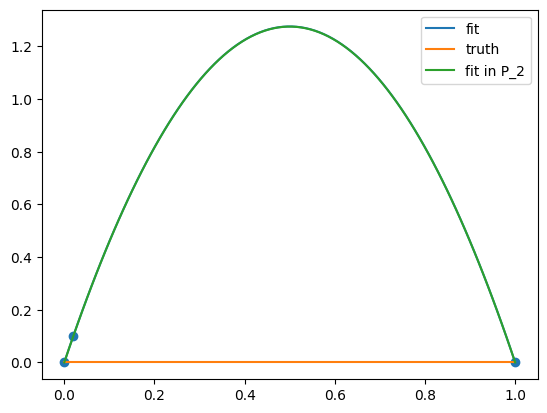

In [10]:
plt.scatter(x,y)

x_all = np.linspace(0,1,100)
y_all = a*(x_all-0)*(x_all-1)
plt.plot(x_all,y_all, label='fit')
plt.plot(x_all,0*y_all, label='truth')

x_all = torch.linspace(0,1,100)
y_all = a_tensor
for k in range(len (r)):
    y_all = y_all*(x_all - r[k])
plt.plot(x_all.detach().numpy(), y_all.detach().numpy(), label='fit in P_2')

plt.legend()


## Standard parameterization

In [11]:
b=torch.tensor([0.0, 0.0, 0.0], requires_grad=True)
lam = 0.1
with torch.no_grad():
    b[0] = 0.0
    b[1] = 5.10204081632653
    b[2] = -5.10204081632653
    b += torch.randn_like(b)*lam

optimizer = torch.optim.SGD([b], lr=0.01)

epochs = 1000

for i in range(epochs):
    optimizer.zero_grad()
    loss = 0
    for j in range(len(x)):
        y_hat = 0 
        for k in range(len(b)):
            y_hat = y_hat + b[k]*x[j]**k
        loss += (y_hat - y[j])**2
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'epoch {i} loss {loss.item()}')

epoch 0 loss 0.03249131143093109
epoch 100 loss 0.0005824851687066257
epoch 200 loss 1.082093695004005e-05
epoch 300 loss 2.0090524799343257e-07
epoch 400 loss 3.939818249421023e-09
epoch 500 loss 3.685375893347498e-10
epoch 600 loss 3.526653968854987e-10
epoch 700 loss 3.526421377131328e-10
epoch 800 loss 3.5266811693190903e-10
epoch 900 loss 3.5268574172242495e-10


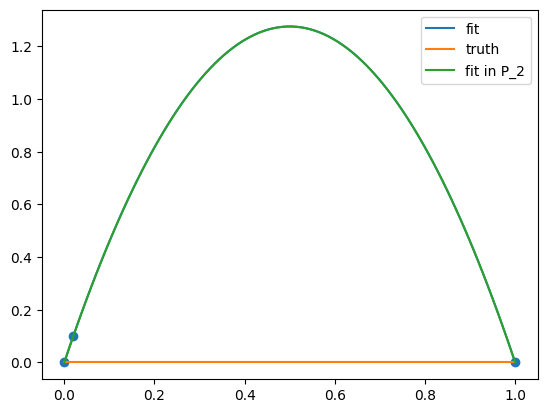

In [12]:
plt.scatter(x,y)

x_all = np.linspace(0,1,100)
y_all = a*(x_all-0)*(x_all-1)
plt.plot(x_all,y_all, label='fit')
plt.plot(x_all,0*y_all, label='truth')

x_all = torch.linspace(0,1,100)
y_all = 0
for k in range(len(b)):
    y_all = y_all + b[k]*x_all**k
plt.plot(x_all.detach().numpy(), y_all.detach().numpy(), label='fit in P_2')

plt.legend()


# Some derivations

In [13]:
sympy.init_printing()

In [14]:
xs, ys = sympy.symbols('x y')

In [15]:
ys = a*(xs-0)*(xs-1)
ys.expand()

In [16]:
print(e_y)
ys.subs(xs, e_x)

0.1


## The Crack!

In [17]:
us = np.linspace(-1,1,100)
vs = np.linspace(-1,1,100)

b = torch.zeros(3)
b[0] = 0.0                
b[1] = 5.10204081632653
b[2] = -5.10204081632653
n1 = torch.randn(3)
n2 = torch.randn(3)

image = np.zeros((100,100))
for u_i,u in enumerate(us):
    for u_j,v in enumerate(vs):
        b_plot = b + v*n1 + u*n2
        loss = 0
        for j in range(len(x)):
            y_hat = 0 
            for k in range(len(b)):
                y_hat = y_hat + b_plot[k]*x[j]**k
            loss += (y_hat - y[j])**2
        image[u_i, u_j] = np.log(loss.item())

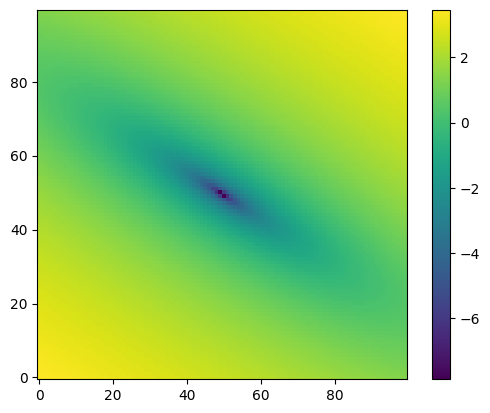

In [18]:
plt.imshow(image, origin='lower')
plt.colorbar()

## High order standard parameterization

In [19]:
b=torch.zeros(5, requires_grad=True)
lam = 1.0
with torch.no_grad():
    b[0] = 0.0
    b[1] = 5.10204081632653
    b[2] = -5.10204081632653
    b[3] = 0.0
    b[4] = 0.0
    b += torch.randn_like(b)*lam

optimizer = torch.optim.SGD([b], lr=0.1)

epochs = 1000

for i in range(epochs):
    optimizer.zero_grad()
    loss = 0
    for j in range(len(x)):
        y_hat = 0 
        for k in range(len(b)):
            y_hat = y_hat + b[k]*x[j]**k
        loss += (y_hat - y[j])**2
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'epoch {i} loss {loss.item()}')

epoch 0 loss 11.191398620605469
epoch 100 loss 3.30787333950866e-05
epoch 200 loss 3.288245716248639e-05
epoch 300 loss 3.2688083592802286e-05
epoch 400 loss 3.249490328016691e-05
epoch 500 loss 3.2302694307873026e-05
epoch 600 loss 3.211239163647406e-05
epoch 700 loss 3.192294389009476e-05
epoch 800 loss 3.173390359734185e-05
epoch 900 loss 3.1545550882583484e-05


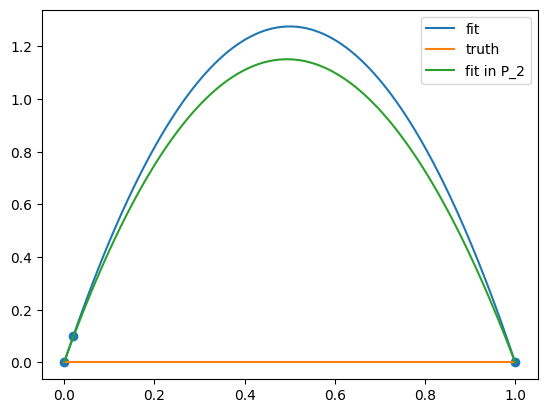

In [20]:
plt.scatter(x,y)

x_all = np.linspace(0,1,100)
y_all = a*(x_all-0)*(x_all-1)
plt.plot(x_all,y_all, label='fit')
plt.plot(x_all,0*y_all, label='truth')

x_all = torch.linspace(0,1,100)
y_all = 0
for k in range(len(b)):
    y_all = y_all + b[k]*x_all**k
plt.plot(x_all.detach().numpy(), y_all.detach().numpy(), label='fit in P_2')

plt.legend()

# Notes

This really is "fitting the noise" in that we cas sum a bunch of polynomials with roots corredponding to the training data, plus perhaps some more "virtual points". Each polynomial fits one error, and the sum of the polynomials fits all of the errors.

$$
a_1 (x-x_2)(x-x_3) + a_2 (x-x_1)(x-x_3) + a_3 (x-x_1)(x-x_2)
$$

The $a_i$ fit the noise at the $x_i$.